# Previsão de entrega por delivey

# 0. Introdução



<p align=center>
  <img src="https://img.freepik.com/vetores-premium/encomende-por-telefone-e-receba-a-comida-na-porta_23-2148555891.jpg?w=2000" width="60%">
</p>

Prever a duração da entrega de um pedido representa um desafio considerável para qualquer serviço de entrega de alimentos. Entre as metodologias mais eficazes para antecipar o tempo de entrega está a avaliação da extensão geográfica entre o local de retirada do pedido e seu destino pretendido. Essa informação é então utilizada para prever o tempo de entrega, baseando-se em dados históricos sobre o tempo que os parceiros de entrega levaram para cumprir pedidos de distâncias comparáveis no passado.

A previsão do tempo de entrega geralmente se enquadra no domínio da modelagem de regressão. A regressão é um tipo de aprendizado de máquina supervisionado em que o objetivo é prever uma saída numérica contínua com base em características de entrada. No contexto da previsão do tempo de entrega, o objetivo é prever uma variável contínua (o tempo de entrega) com base em várias características de entrada, como atributos da pessoa de entrega, coordenadas de localização, tipo de pedido, tipo de veículo, etc.

Existem várias técnicas de regressão disponíveis para construir um modelo de previsão de tempo de entrega, incluindo:

**Regressão Linear:** Modelos de regressão linear pressupõem uma relação linear entre características de entrada e a variável alvo. Esta abordagem é ideal quando a relação é aproximadamente linear.

**Regressão de Random Fores:** Random forest é um método de conjunto que combina múltiplas árvores de decisão para previsões. Ele se destaca na captura de relações não lineares e interações entre características.

**Regressão por Gradiente Boosting:** O gradiente boosting monta árvores de decisão sequencialmente para corrigir os erros das árvores anteriores. É notavelmente eficaz para tarefas preditivas.

**Regressão por Vetores de Suporte (SVR):** SVR tem suas raízes nas máquinas de vetores de suporte e se destaca ao lidar com padrões não lineares nos dados.

In [1]:
# Importando pacotes

# pacotes de análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignorando avisos
import warnings
warnings.filterwarnings('ignore')

# processamento de dados
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# avaliação e testes
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# importando dados
df = pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


## 1. Informação dos dados e análise univariada

In [3]:
def data_info(df):
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nNome das variáveis:\n{}".format(df.columns.values))
    print("\nTipos de cada variável:\n{}".format(df.dtypes))
    print("\nValores únicos (por coluna):\n{}".format(df.nunique().sort_values(ascending=False)))
    print("\nPorcentagem de valores ausentes (por coluna):\n{}".format((df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)))

In [4]:
data_info(df)

Número de entradas (linhas):  45593

Número de variáveis (colunas):  11

Nome das variáveis:
['ID' 'Delivery_person_ID' 'Delivery_person_Age' 'Delivery_person_Ratings'
 'Restaurant_latitude' 'Restaurant_longitude' 'Delivery_location_latitude'
 'Delivery_location_longitude' 'Type_of_order' 'Type_of_vehicle'
 'Time_taken(min)']

Tipos de cada variável:
ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

Valores únicos (por coluna):
ID                             45355
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Delivery_person_ID              1320
Restaurant_latitude       

In [5]:
df.Type_of_order.unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [6]:
df.Type_of_vehicle.unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

`ID`: Um identificador único para cada registro de entrega.

`Delivery_person_ID`: Um identificador único para a pessoa responsável pela entrega.

`Delivery_person_Age`: A idade da pessoa responsável pela entrega.

`Delivery_person_Ratings`: As avaliações ou feedback do entregador, recebidos pelos clientes, refletindo a qualidade do serviço.

`Restaurant_latitude`: A coordenada de latitude do restaurante onde o pedido é preparado.

`Restaurant_longitude`: A coordenada de longitude do restaurante onde o pedido é preparado.

`Delivery_location_latitude`: A coordenada de latitude do local de entrega onde o pedido será entregue.

`Delivery_location_longitude`: A coordenada de longitude do local de entrega onde o pedido será entregue.

`Type_of_order`: A categoria ou tipo do pedido, que pode ser `'Snack ', 'Drinks ', 'Buffet ', 'Meal '`.

`Type_of_vehicle`: O tipo de veículo usado para a entrega, indicando se é `'motorcycle', 'scooter', 'electric_scooter', 'bicycle'`.

`Time_taken(min)`: O tempo necessário para completar a entrega, medido em minutos.

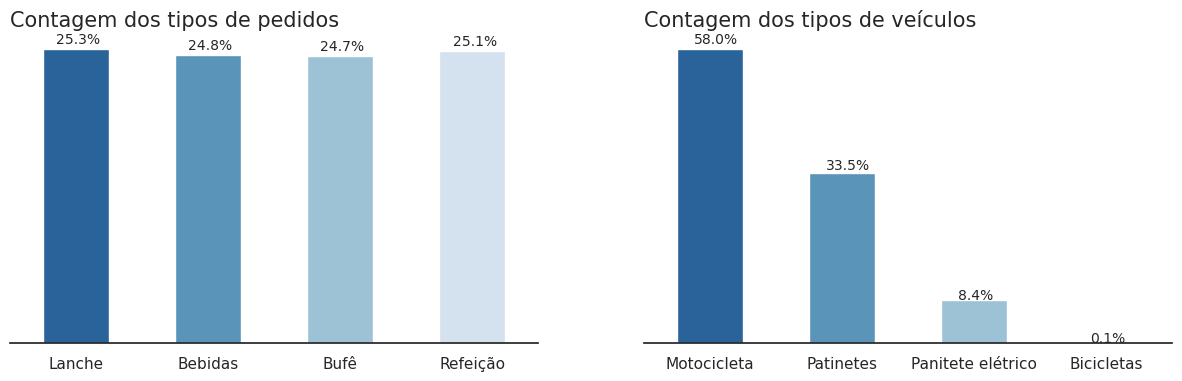

In [7]:
sns.set_theme(style = "white")

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize = (15,4))

#ax1 
sns.countplot(data=df, x= df['Type_of_order'], palette = "Blues_r", width = 0.5, ax= ax1)
ax1.set_title("Contagem dos tipos de pedidos", loc ='left', fontsize=15)
ax1.set_yticklabels([])
ax1.set_xticklabels(['Lanche', 'Bebidas', 'Bufê', 'Refeição'])
ax1.set_ylabel('')
ax1.set_xlabel('')
sns.despine(left=True, ax=ax1)

total = len(df['Type_of_order'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()*1.02
    ax1.annotate(percentage, (x,y), size = 10)
    
    
#ax2
sns.countplot(data=df, x= df['Type_of_vehicle'], palette = "Blues_r", width = 0.5, ax= ax2)
ax2.set_title("Contagem dos tipos de veículos", loc ='left', fontsize=15)
ax2.set_yticklabels([])
ax2.set_xticklabels(['Motocicleta', 'Patinetes', 'Panitete elétrico', 'Bicicletas'])
ax2.set_ylabel('')
ax2.set_xlabel('')
sns.despine(left=True, ax=ax2)

total = len(df['Type_of_vehicle'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/4
    y = p.get_y() + p.get_height()*1.02
    ax2.annotate(percentage, (x,y), size = 10)    

Na análise das variáveis categóricas, observa-se que:

* O tipo de pedido mais popular é o de lanches, enquanto o menos solicitado é o de bufê. Em segundo lugar em termos de demanda estão as refeições.
* O meio de transporte mais frequente entre os entregadores é a motocicleta, enquanto o menos utilizado é a bicicleta.






In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Sobre as variáveis numéricas:

* A idade máxima de um entregador é 50 anos, com uma média em torno de 29 anos e a mínima é de 15 anos.

* As avaliações do entregador variam de 1 a 6.

* O tempo máximo (em minutos) de uma entrega é 54 minutos, e o mínimo é 10 minutos.

# 2. Análise bivariada

In [9]:
print('Média de tempo de entrega para cada tipo de pedido:')
print(df.groupby('Type_of_order')['Time_taken(min)'].mean().sort_values(ascending=False))

Média de tempo de entrega para cada tipo de pedido:
Type_of_order
Meal       26.419270
Snack      26.286309
Buffet     26.283511
Drinks     26.187953
Name: Time_taken(min), dtype: float64


Ao analisar os tempos médios de entrega para cada tipo de pedido, percebe-se uma mínima variação entre as categorias. Refeições (Meal), lanches (Snack), bufê (Buffet) e bebidas (Drinks) têm tempos médios de entrega extremamente próximos, todos aproximadamente em torno de 26 minutos

In [10]:
print('Média de tempo de entrega para cada veículo utilizado:')
print(df.groupby('Type_of_vehicle')['Time_taken(min)'].mean().sort_values(ascending=False))

Média de tempo de entrega para cada veículo utilizado:
Type_of_vehicle
motorcycle           27.605674
bicycle              26.426471
scooter              24.480754
electric_scooter     24.470110
Name: Time_taken(min), dtype: float64



Analisando as médias de tempo de entrega para cada tipo de veículo utilizado, nota-se algumas diferenças sutis nos tempos médios. As entregas feitas por motocicletas têm uma média ligeiramente mais alta, em torno de 27.6 minutos, enquanto as entregas realizadas por bicicletas têm uma média próxima, em torno de 26.4 minutos. Por outro lado, tanto os patinetes (scooter) quanto os patinetes elétricos (electric_scooter) apresentam médias mais baixas, em torno de 24.5 minutos

## Matriz de correlação

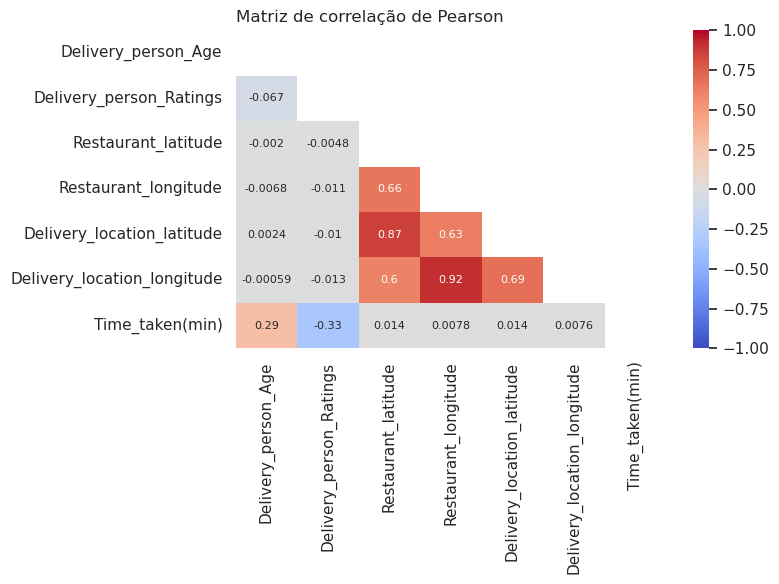

In [11]:
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"fontsize": 8})
plt.title("Matriz de correlação de Pearson", loc= 'left')
plt.tight_layout()
plt.show()

* A correlação de -0,067 entre `Delivery_person_Ratings` e `Delivery_person_Age` indica uma relação muito fraca e praticamente insignificante entre a idade do entregador e suas avaliações.

* A correlação de 0,66 entre `Restaurant_longitude` e `Restaurant_latitude` sugere uma associação moderada e positiva entre a longitude e a latitude dos restaurantes, indicando que locais com longitudes maiores tendem a ter latitudes maiores, e vice-versa.

* Correlações mais altas, como 0,87 entre `Delivery_location_latitude` e `Restaurant_latitude`, 0,63 entre `Delivery_location_latitude` e `Restaurant_longitude`, e 0,6 entre `Delivery_location_longitude` e `Restaurant_latitude`, indicam uma relação significativa entre as coordenadas de entrega e as coordenadas do restaurante. Isso sugere que os locais de entrega estão correlacionados com a localização do restaurante, o que faz sentido para a entrega de pedidos.

* A forte correlação de 0,92 entre `Delivery_location_longitude` e `Restaurant_longitude` também destaca uma forte associação entre as longitudes do local de entrega e do restaurante, indicando uma proximidade geográfica entre esses locais.

* A correlação de 0,69 entre `Delivery_location_longitude` e `Delivery_location_latitude` sugere uma relação moderada entre as coordenadas de entrega, indicando que locais com uma longitude específica tendem a ter uma latitude correspondente.

* Por fim, as correlações de 0,29 entre `Time_taken(min)` e `Delivery_person_Age` e de -0,33 entre `Time_taken(min)` e `Delivery_person_Ratings` são indicativos de relações relativamente fracas entre o tempo de entrega e a idade ou avaliações do entregador, mas ainda merecem alguma consideração.

# 3. Feature engineering e novas informações

Para avançar no projeto, são necessários vários ajustes no DataFrame. Serão introduzidas duas colunas adicionais para capturar informações pertinentes. A primeira coluna refletirá a distância de deslocamento entre o restaurante e o cliente, enquanto a segunda representará a velocidade associada a cada tipo de veículo.

Para uma melhor organização do DataFrame, as colunas ID e Delivery_person_ID serão eliminadas. Inicialmente, essas colunas não contribuem para a construção do modelo de aprendizado de máquina.

Revisões na estrutura do DataFrame facilitarão uma abordagem mais eficiente para aprimorar a eficácia do modelo.

In [12]:
# backup
df_new = df.copy()

In [13]:
# Lista de colunas a serem deletadas
columns_to_delete = ['ID', 'Delivery_person_ID']

# Delete de colunas
df_new = df_new.drop(columns=columns_to_delete)

In [14]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = 6371 * c
    return distance


df_new['distance'] = df_new.apply(lambda row: haversine_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [15]:
df_new['Time_taken(hr)'] = df_new['Time_taken(min)']/60
df_new['speed'] = df_new['distance']/df_new['Time_taken(hr)']

In [16]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,Time_taken(hr),speed
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149,0.400000,7.562873
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530,0.550000,36.697327
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758,0.433333,3.583287
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401,0.350000,22.258290
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138,0.500000,12.420276


In [17]:
columns_to_drop = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_taken(hr)']

df_new = df_new.drop(columns=columns_to_drop )

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance,speed
0,37,4.9,Snack,motorcycle,24,3.025149,7.562873
1,34,4.5,Snack,scooter,33,20.183530,36.697327
2,23,4.4,Drinks,motorcycle,26,1.552758,3.583287
3,38,4.7,Buffet,motorcycle,21,7.790401,22.258290
4,32,4.6,Snack,scooter,30,6.210138,12.420276


In [18]:
df_new[['distance', 'speed']].describe()

,distance,speed
count,45593.000000,45593.000000
mean,99.303911,262.045334
std,1099.731281,3147.743785
min,1.465067,1.696010
25%,4.663493,12.581569
50%,9.264281,20.725588
75%,13.763977,31.595710
max,19692.674606,107403.910650


A introdução de novas variáveis revelou certas inconsistências nos dados. Por exemplo, na coluna de distância, enquanto a distância máxima atinge 19692.67 km, o quarto quartil fica em 13.76 km. Uma questão semelhante surge na coluna de velocidade, com um valor no quarto quartil de 31.59, mas um valor máximo excepcional de 107403.91. Essas disparidades exigem uma investigação mais aprofundada para determinar possíveis anomalias ou erros no conjunto de dados.

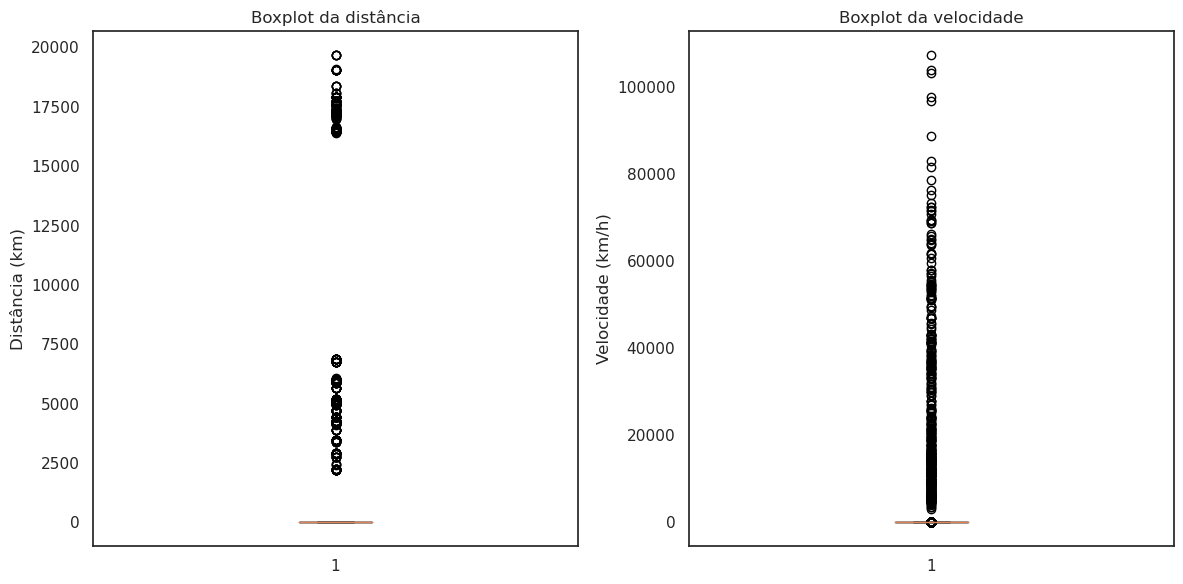

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot 1
plt.boxplot(df_new['distance'])
plt.title('Boxplot da distância')
plt.ylabel('Distância (km)')

plt.subplot(1, 2, 2)  # Subplot 2
plt.boxplot(df_new['speed'])
plt.title('Boxplot da velocidade')
plt.ylabel('Velocidade (km/h)')

plt.tight_layout() 
plt.show()

In [20]:
def outlier_boundary(dataset, column_list):
    for column in column_list:
        if column in dataset:
            desc = dataset[column].describe()
            Q1 = desc["25%"]
            Q3 = desc["75%"]
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            print(f"O limiete superior da {column} é {upper} e o limite inferior é {lower}.")

# Application
outlier_boundary(df_new, ['distance', 'speed'])

O limiete superior da distance é 27.414703351191108 e o limite inferior é -8.987232986844802.
O limiete superior da speed é 60.11692182808743 e o limite inferior é -15.939642264924677.


In [21]:
cols_outliers = ['distance', 'speed']

for feature in cols_outliers:
    Q1 = df_new[feature].quantile(q=0.25)  
    Q3 = df_new[feature].quantile(q=0.75)  
    IQR = Q3 - Q1  
    Upper_Limit = Q3 + 1.5 * IQR  
    Lower_Limit = Q1 - 1.5 * IQR  

    
    df_new = df_new.loc[(df_new[feature] >= Lower_Limit) & (df_new[feature] <= Upper_Limit)]

   
    df_new = df_new.reset_index(drop=True)

In [22]:
df_new[['distance', 'speed']].describe()

,distance,speed
count,43585.000000,43585.000000
mean,9.435049,22.060387
std,5.452926,12.720305
min,1.465067,1.696010
25%,4.657347,12.174454
50%,9.121874,19.948650
75%,13.407034,29.828812
max,20.969489,59.092155


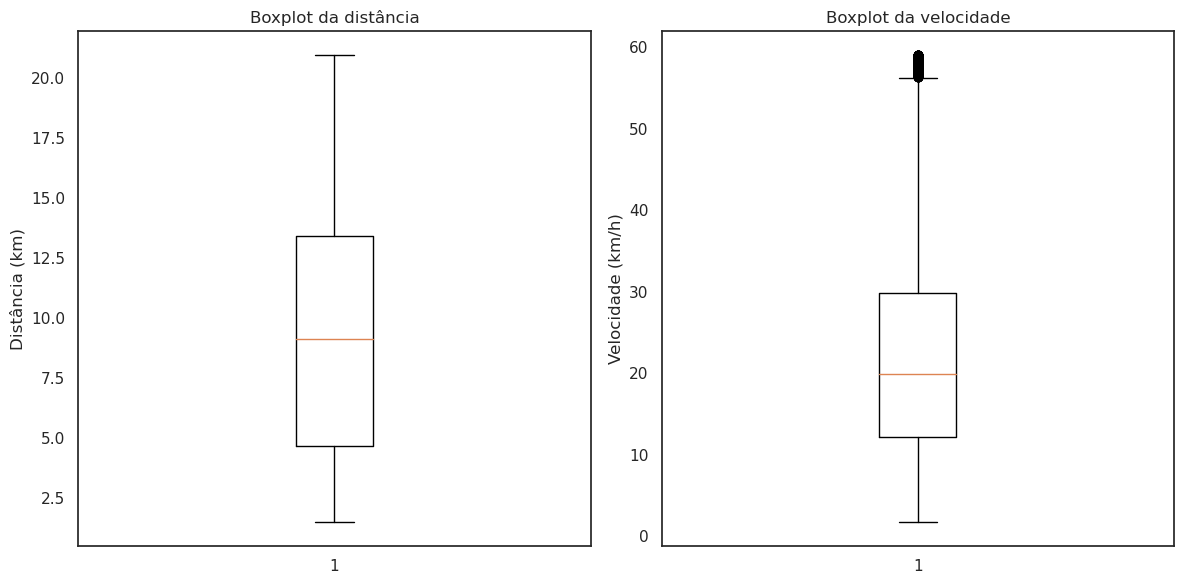

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.boxplot(df_new['distance'])
plt.title('Boxplot da distância')
plt.ylabel('Distância (km)')

plt.subplot(1, 2, 2) 
plt.boxplot(df_new['speed'])
plt.title('Boxplot da velocidade')
plt.ylabel('Velocidade (km/h)')

plt.tight_layout() 
plt.show()

Após o ajuste dos dados, surgem observações significativas. O valor máximo da distância agora gira em torno de aproximadamente 21 km, enquanto o mínimo fica em 1.46 km. Da mesma forma, na característica de velocidade, o valor máximo registrado é de 59 km/h, enquanto o mínimo é de cerca de 1.7 km/h. Esses intervalos refinados sugerem que o conjunto de dados agora apresenta uma representação mais coerente e precisa das informações subjacentes.

## Codificação de colunas categóricas e padronização das variáveis numéricas

Ao realizar esta etapa de pré-processamento, visamos estabelecer uma base sólida para a construção de um modelo de machine learning eficaz

Os passos de pré-processamento envolvem:

* Escalonamento de Características Numéricas: Para garantir que nosso modelo funcione de forma ideal, aplicaremos escalonamento de características à `Delivery_person_Age`, `Distance` e `speed`usando StandardScaler e  `Delivery_person_Ratings` usando MinMaxScaler.

* Codificação de Características Categóricas: Além disso, usaremos o OneHotEncoder para codificar as variáveis categóricas `Type_of_order` e `Type_of_vehicle`. Essa transformação converterá essas variáveis categóricas em formato numérico, criando colunas binárias distintas para cada categoria. Dessa forma, o modelo pode usar efetivamente essas variáveis durante o treinamento.

In [24]:
df_clean = df_new.copy()

In [25]:
std_scaler = StandardScaler()
min_max = MinMaxScaler()

df_clean['Delivery_person_Age'] = std_scaler.fit_transform(df_clean['Delivery_person_Age'].values.reshape(-1,1))
df_clean['distance'] = std_scaler.fit_transform(df_clean['distance'].values.reshape(-1,1))
df_clean['speed'] = std_scaler.fit_transform(df_clean['speed'].values.reshape(-1,1))
df_clean['Delivery_person_Ratings'] = min_max.fit_transform(df_clean['Delivery_person_Ratings'].values.reshape(-1,1))

In [26]:
df_clean.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance,speed
0,1.290293,0.78,Snack,motorcycle,24,-1.175511,-1.139727
1,0.763561,0.70,Snack,scooter,33,1.971163,1.150688
2,-1.167790,0.68,Drinks,motorcycle,26,-1.445533,-1.452584
3,1.465871,0.74,Buffet,motorcycle,21,-0.301612,0.015558
4,0.412406,0.72,Snack,scooter,30,-0.591416,-0.757861


In [27]:
ohe = OneHotEncoder()

cols_to_onehot = ['Type_of_order', 'Type_of_vehicle']

df_encoded = ohe.fit_transform(df_clean[cols_to_onehot])
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=ohe.get_feature_names_out(cols_to_onehot))

df_clean.drop(columns=cols_to_onehot, inplace=True)

df_clean = pd.concat([df_clean.reset_index(drop=True), df_encoded], axis=1)

In [28]:
df_clean.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance,speed,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,1.290293,0.78,24,-1.175511,-1.139727,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.763561,0.70,33,1.971163,1.150688,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.167790,0.68,26,-1.445533,-1.452584,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.465871,0.74,21,-0.301612,0.015558,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.412406,0.72,30,-0.591416,-0.757861,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
X = df_clean.drop('Time_taken(min)', axis = 1)
y = df_clean['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state=42)

In [30]:
y_train.head()

18981    26
4183     27
25780    22
41344    26
22256    16
Name: Time_taken(min), dtype: int64

# 4. Criando o modelo de Machine Learning



In [59]:
def model_evaluation(X, y, model, verbose=True):
    # Transformando os dados de entrada em arrays numpy
    X = np.array(X)
    y = np.array(y)

    # Realizando a validação cruzada do modelo e calculando as métricas de avaliação
    r2_scores = cross_val_score(model, X, y, scoring='r2')
    mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error')

    # Armazenando as métricas em um dicionário
    metrics = {
        'R2 Score': r2_scores.mean(),
        'R2 Score Std': r2_scores.std(),
        'Mean Squared Error': mse_scores.mean(),
        'Mean Squared Error Std': mse_scores.std()
    }

    # Exibindo as métricas se verbose=True
    if verbose:
        print(f'{model.__class__.__name__} metrics: {metrics}')

    # Retornando o dicionário de métricas
    return metrics

In [60]:
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
elastic_regression = ElasticNet()
rf_regression = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
svr_regression= SVR(kernel='linear')

models = [linear_regression,
          ridge_regression,
          lasso_regression,
          elastic_regression,
          rf_regression,
          gradient_boosting,
          svr_regression
]

metrics_dict = {}

In [61]:
for model in models:
    metrics = model_evaluation(X_train, y_train, model)
    model_name = model.__class__.__name__
    metrics_dict[model_name] = metrics

df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')

LinearRegression metrics: {'R2 Score': 0.8094398806771442, 'R2 Score Std': 0.0013194678885079622, 'Mean Squared Error': 16.433228996464585, 'Mean Squared Error Std': 0.419397118555478}
Ridge metrics: {'R2 Score': 0.8094448591470964, 'R2 Score Std': 0.0013171816309213455, 'Mean Squared Error': 16.432787404859834, 'Mean Squared Error Std': 0.4188514921739271}
Lasso metrics: {'R2 Score': 0.7023254922524138, 'R2 Score Std': 0.0035318912542084773, 'Mean Squared Error': 25.672048120673622, 'Mean Squared Error Std': 0.7547778675055419}
ElasticNet metrics: {'R2 Score': 0.39762613724804796, 'R2 Score Std': 0.0026742682411691086, 'Mean Squared Error': 51.944434401560486, 'Mean Squared Error Std': 1.2070777782896662}
RandomForestRegressor metrics: {'R2 Score': 0.999215698974707, 'R2 Score Std': 0.00017999620386407715, 'Mean Squared Error': 0.06617168374501678, 'Mean Squared Error Std': 0.01352272492833655}
GradientBoostingRegressor metrics: {'R2 Score': 0.9774728053809388, 'R2 Score Std': 0.00102

In [62]:
df_metrics

,R2 Score,R2 Score Std,Mean Squared Error,Mean Squared Error Std
LinearRegression,0.809440,0.001319,16.433229,0.419397
Ridge,0.809445,0.001317,16.432787,0.418851
Lasso,0.702325,0.003532,25.672048,0.754778
ElasticNet,0.397626,0.002674,51.944434,1.207078
RandomForestRegressor,0.999216,0.000180,0.066172,0.013523
GradientBoostingRegressor,0.977473,0.001022,1.942684,0.100564
SVR,0.803641,0.001796,16.934490,0.484544



Analisando as métricas de desempenho dos modelos, é possível tirar algumas conclusões:

**R2 Score**: É uma medida que varia de 0 a 1, onde valores mais próximos de 1 indicam um modelo que se ajusta melhor aos dados. Valores próximos de 0 ou negativos indicam um ajuste fraco ou que o modelo não consegue capturar a variabilidade dos dados.

**Mean Squared Error (Erro Quadrático Médio)**: Mede a média dos quadrados dos erros, onde valores menores indicam um modelo mais preciso.

Com base nessas métricas:

* RandomForestRegressor e GradientBoostingRegressor têm os melhores R² Score. O RandomForestRegressor teve um desempenho excepcionalmente alto, próximo a 1, indicando um ajuste quase perfeito aos dados de treinamento. O GradientBoostingRegressor também teve um desempenho muito bom, embora ligeiramente inferior ao RandomForestRegressor.

* LinearRegression, Ridge e Lasso estão próximos em termos de R² Score, com pequenas variações. Isso sugere que a regularização (Ridge e Lasso) não teve um impacto significativo na performance em comparação com a regressão linear simples neste conjunto de dados.

* Lasso (L1) apresentou um R² Score um pouco inferior ao Ridge (L2), o que pode indicar que a penalização L1 não foi tão benéfica quanto a penalização L2 para este conjunto de dados. No entanto, ambas estão próximas em termos de desempenho.

* ElasticNet, uma combinação de penalizações L1 e L2, teve um desempenho intermediário. Ele pode ter encontrado um compromisso entre a seleção de variáveis (Lasso) e estabilidade (Ridge).

* SVR obteve um R² Score razoável, mas ficou abaixo dos modelos baseados em árvore (RandomForestRegressor e GradientBoostingRegressor). Isso pode indicar que a relação entre as variáveis de entrada e saída não é completamente linear.

* O MSE segue uma tendência semelhante ao R² Score, com os modelos com melhor R² Score também tendo um MSE mais baixo, o que indica menor erro médio ao prever os valores.

Portanto, com base nessas métricas, o melhor modelo seria o de **RandomForestRegressor**. Este modelo apresentou melhor ajuste aos dados e menor erro médio quadrático em comparação com os outros modelos avaliados.

## Tuning dos hiperparâmetros

Os hiperparâmetros são configurações ajustáveis que não são aprendidos pelo modelo, mas que têm um papel crítico no desempenho e na capacidade do modelo de generalizar para novos dados.

A importância do tuning de hiperparâmetros reside no fato de que diferentes conjuntos de hiperparâmetros podem levar a modelos com desempenhos muito diferentes, mesmo quando aplicados aos mesmos dados

In [63]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [64]:
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Teste do modelo final

In [31]:
best_model =  RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [32]:
# instanciando modelo final
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [33]:
y_pred = best_model.predict(X_test)

In [34]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R2 do melhor modelo: {r2: .4f}")
print(f"MSE do melhor modelo: {mse: .4f}")

R2 do melhor modelo:  0.9992
MSE do melhor modelo:  0.0651


### Feature Importance

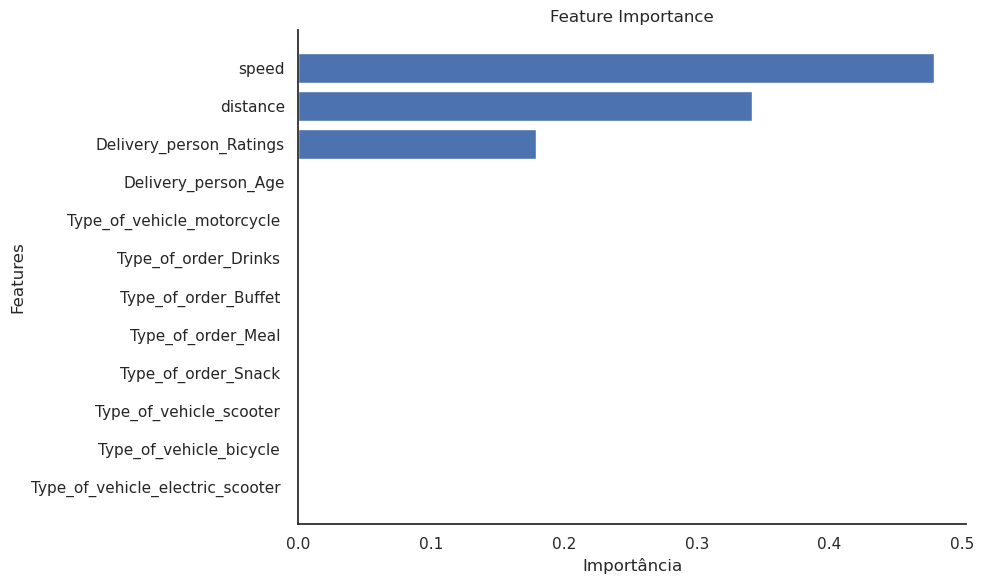

In [35]:
# Feature importance
feature_importance = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), feature_importance[indices][::-1])  # Inverted
plt.yticks(range(X_train.shape[1]), names[::-1], rotation=0)  # Inverted
plt.xlabel("Importância")
plt.ylabel("Features")
sns.despine()
plt.tight_layout()
plt.show()

Baseando-me nos valores de importância atribuídos às features no modelo de regressão com Random Forest:

* Speed com importância próxima de 0.5: Isso sugere que a variável 'Speed' é considerada a mais influente na previsão do resultado alvo (a variável que você está tentando prever). É provável que a velocidade tenha um impacto substancial na resposta ou no resultado que o modelo está tentando capturar. No contexto de, por exemplo, previsões de entrega, isso pode indicar que a velocidade de entrega é um fator crucial na determinação de resultados como satisfação do cliente ou tempo de entrega.

* Distance com importância entre 0.3 e 0.4: Embora não seja tão dominante quanto 'Speed', a 'Distance' ainda possui uma importância significativa. Isso implica que a distância a ser percorrida pode desempenhar um papel relevante nas previsões do modelo. Isso pode ser crucial em cenários logísticos, onde a distância pode influenciar custos, tempo de entrega e eficiência operacional.

* Delivery_person_ratings com importância próxima de 0.2: Esta feature também possui uma importância considerável, embora menor em comparação com 'Speed' e 'Distance'. Isso sugere que a classificação do entregador pode impactar as previsões, mas talvez não tanto quanto a velocidade ou a distância. No entanto, ainda é um fator relevante na determinação do resultado previsto. Isso pode indicar que a qualidade do serviço prestado pelo entregador desempenha um papel moderado nas previsões.

**Insights e Considerações**:

* Priorização da Velocidade: A importância atribuída à 'Speed' destaca a importância de otimizar a velocidade de entrega para resultados positivos, como satisfação do cliente, retenção e eficiência operacional. E isto pode ser levando em consideração o meio de transporte utilizado pelo entregador.

* Gerenciamento de Distância: 'Distance' também é um fator-chave. Estratégias para minimizar distâncias ou otimizar rotas podem melhorar a eficiência geral da entrega e reduzir custos operacionais.

* Qualidade do Serviço do Entregador: Embora menos influente que velocidade e distância, a 'Delivery_person_ratings' ainda é relevante. Isso enfatiza a importância de manter altos padrões de serviço entre os entregadores para garantir a satisfação do cliente e a reputação do serviço de entrega.

### Salvando o modelo

In [39]:
import joblib

model_data = {
    'best_model': best_model,
    'std_scaler': std_scaler,
    'min_max': min_max,
    'ohe': ohe
}

model_filename = 'best_trained_model.joblib'
joblib.dump(model_data, model_filename)

['best_trained_model.joblib']

# 5.Conclusão

O projeto de Previsão de Tempo de Deliney procurou se utilizar de partes importantes do trabalho de um cientista de dados. Começando com uma análise exploratório para entender como estavam distribuídas as variáveis e analis-las. Também foi identificado atributos influentes, como distância e velocidade, que impactam os tempos de entrega. O refinamento dos dados foi essencial, incluindo tarefas de pré-processamento como escalonamento e codificação de variáveis, visando aprimorar o desempenho do modelo. A validação cruzada levou à escolha do RandomForestRegressor, cujo ajuste padrão resultou na melhor performance. No fim, o modelo selecionado demonstrou precisão na previsão dos tempos de entrega, consolidando o sucesso do projeto através da feature engineering, limpeza de dados e ajustes.